In [12]:
# 线性回归
# y(w,x) = w0 + w1x1 + w2x2 + ... + wixi
import numpy as np
from sklearn.linear_model import LinearRegression
# 输入变量必须是列向量，而输出的这个变量则相对自由
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X,np.array([1,2])) + 3
# 拟合
reg = LinearRegression()
reg.fit(X, y)
# 系数
reg.coef_
# 偏差值
reg.intercept_
# 预测
reg.predict(np.array([[3, 5]]))

array([16.])

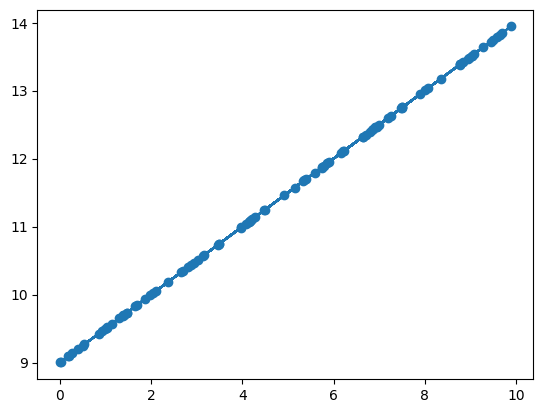

In [14]:
# 案例
# 拟合y = ax + b
# reshape满足数据结构要求
# X = np.arange(1,101).reshape(-1,1)
rng = np.random.RandomState(1)
X = np.reshape(rng.rand(100)*10,[-1,1])
y = np.dot(X,0.5) + 9
# 查看散点图
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(8,5))
ax.scatter(X,y);
# 拟合
reg = LinearRegression()
reg.fit(X,y)
# 系数
reg.coef_
# 偏差
reg.intercept_
# 预测
reg.predict(np.array([[200]]))
# 模型评估
reg.score(X,y)
# 可视化
ax.plot(X,y);

In [22]:
# 多维
X = 10 * rng.rand(100,3)
y = 0.5 + np.dot(X,[1.5,-2,1.0])
# 拟合
reg.fit(X,y)
print(reg.coef_,reg.intercept_)
reg.score(X,y)

[ 1.5 -2.   1. ] 0.4999999999999929


1.0

0.9777552987600251

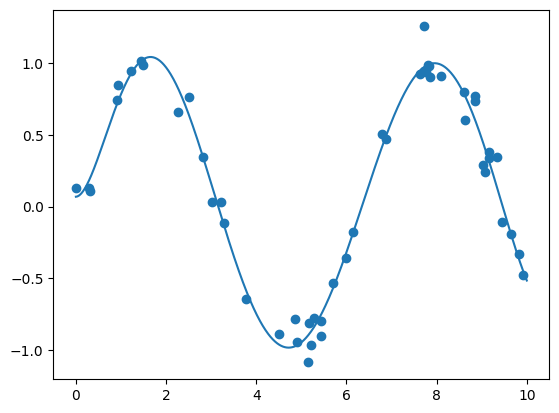

In [ ]:
# 基函数回归
# 多项式基函数：一维投影到高维，拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
x = np.array([2,3,4])
poly = PolynomialFeatures(4,include_bias=False)
# x[:,None]
# np.reshape(x,[-1,1])
# x[:,np.newaxis]
# rng.rand(50,1)
# 0.1*rng.randn(50,1)
poly.fit_transform(x[:,np.newaxis])
# 案例
# 数据导入
x = 10*rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)
# 管道内，投影7次，线性拟合
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())
poly_model.fit(x[:,np.newaxis],y)
# 预测新数据
xfit = np.linspace(0,10,1000)
yfit = poly_model.predict(xfit[:,np.newaxis])
# 可视化
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(8,5))
ax.scatter(x,y)
ax.plot(xfit,yfit);
# 模型评估
poly_model.score(x[:,np.newaxis],y)

In [59]:
# 高斯基函数
from sklearn.base import BaseEstimator, TransformerMixin
# 数据导入
x = 10*rng.rand(50)
y = np.sin(x) + 0.1*rng.randn(50)
xfit = np.linspace(0,10,1000)
# 创建高斯基函数
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """一维输入均匀分布的高斯特征"""
    def __init__(self,N,width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg**2,axis))
    def fit(self,X,y=None):
        self.centers_ = np.linspace(X.min(),X.max(),self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],
                                 self.centers_,
                                 self.width_,
                                 axis=1)
gauss_model = make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit = gauss_model.predict(xfit[:,np.newaxis])

0.9837585192324395

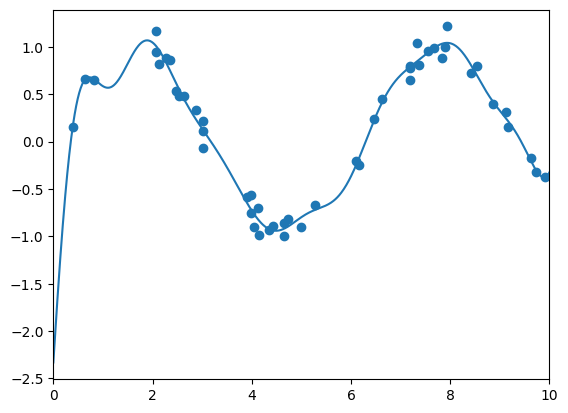

In [62]:
# 可视化
# 可视化
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(8,5))
ax.scatter(x,y)
ax.plot(xfit,yfit)
ax.set_xlim(0,10);
# 模型评估
gauss_model.score(x[:,np.newaxis],y)

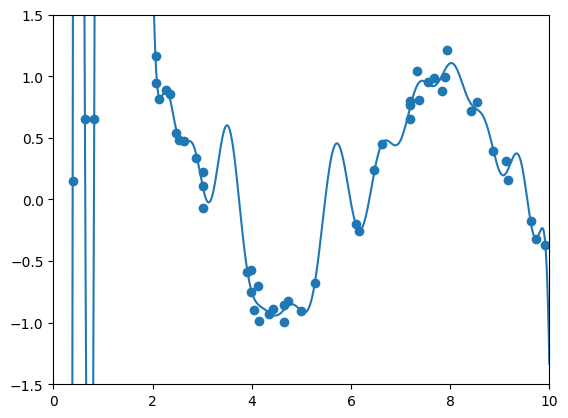

In [68]:
# 正则化
model = make_pipeline(GaussianFeatures(30),LinearRegression())
model.fit(x[:,np.newaxis],y)
yfit = model.predict(xfit[:,np.newaxis])
# 可视化
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(12,5))
ax.scatter(x,y)
ax.plot(xfit,yfit)
ax.set_xlim(0,10)
ax.set_ylim(-1.5,1.5);
# 过拟合

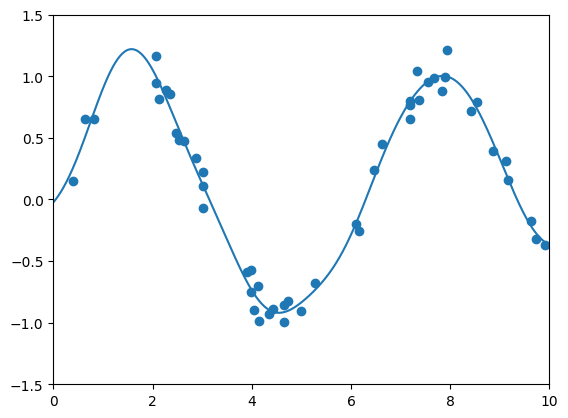

In [71]:
# 岭回归
from sklearn.linear_model import Ridge
model1 = make_pipeline(GaussianFeatures(30),Ridge(alpha=0.05))
model1.fit(x[:,np.newaxis],y)
yfit = model1.predict(xfit[:,np.newaxis])
# 可视化
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(12,5))
ax.scatter(x,y)
ax.plot(xfit,yfit)
ax.set_xlim(0,10)
ax.set_ylim(-1.5,1.5);
# 优化后

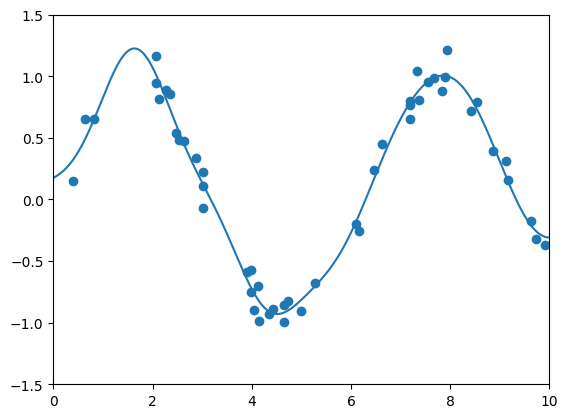

In [72]:
# Lasso正则化
from sklearn.linear_model import Lasso
model1 = make_pipeline(GaussianFeatures(30),Lasso(alpha=0.001))
model1.fit(x[:,np.newaxis],y)
yfit = model1.predict(xfit[:,np.newaxis])
# 可视化
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figure=(12,5))
ax.scatter(x,y)
ax.plot(xfit,yfit)
ax.set_xlim(0,10)
ax.set_ylim(-1.5,1.5);
# 优化后